In [1]:
laptop = True

if laptop:
    rootF = 'C:/Users/goethas/'
else:
    rootF = '/home/sarah/'

In [2]:
import os as os
import sys
import numpy as np
import cv2
import csv

from numpy import *
from scipy.stats import linregress
from scipy.signal import correlate
import pickle as pickle
import pandas as pd
from tqdm.auto import tqdm

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from shared.save_load import *

In [3]:
exp = 20221214

# Experiment conditions
if exp in [19, 20211022, 20211103]:
    from shared.parameters_stimulation1 import *
elif exp in [20211129, 20211207, 20211208, 20220224, 20221213, 20221214]:
    from shared.parameters_stimulation2 import *
    pixel_size_um = 3.5
    pixel_per_check = 12
    nb_checks = 60

# Load data

In [4]:
data_path = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

### Spike counts

In [5]:
blur_data = load(data_path + str(exp) + '_selected_cells_spike_count_with_noise.npz')

spike_counts = blur_data['spike_count']
spike_counts_mean = blur_data['spike_count_mean']
spike_counts_std = blur_data['spike_count_std']
clusters = blur_data['clusters']

Ncells = len(clusters)

print (shape(spike_counts))

(112, 4, 2, 9, 4, 25)


In [6]:
# from code: "2_Select_clusters_makeSTA.ipynb"

cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

data_clusters = list(cell_data.keys())

data_clusters

['2',
 '4',
 '6',
 '17',
 '18',
 '21',
 '29',
 '30',
 '31',
 '39',
 '40',
 '47',
 '48',
 '52',
 '54',
 '56',
 '60',
 '64',
 '65',
 '66',
 '67',
 '68',
 '72',
 '80',
 '84',
 '87',
 '101',
 '103',
 '106',
 '110',
 '112',
 '115',
 '116',
 '119',
 '123',
 '129',
 '135',
 '137',
 '139',
 '140',
 '152',
 '157',
 '158',
 '161',
 '162',
 '164',
 '166',
 '168',
 '170',
 '180',
 '183',
 '184',
 '190',
 '193',
 '197',
 '201',
 '203',
 '205',
 '213',
 '217',
 '221',
 '226',
 '231',
 '236',
 '237',
 '242',
 '244',
 '246',
 '255',
 '259',
 '260',
 '263',
 '265',
 '270',
 '271',
 '272',
 '275',
 '279',
 '280',
 '282',
 '284',
 '287',
 '289',
 '290',
 '292',
 '299',
 '305',
 '307',
 '312',
 '315',
 '316',
 '318',
 '319',
 '323',
 '326',
 '332',
 '343',
 '346',
 '347',
 '354',
 '356',
 '358',
 '360',
 '361',
 '362',
 '368',
 '379',
 '382',
 '385',
 '398',
 '400',
 '402',
 '404',
 '416',
 '417',
 '418',
 '421',
 '427',
 '431',
 '434',
 '439',
 '450',
 '465',
 '483',
 '489',
 '496',
 '504',
 '512',
 '519

### Baden types

In [7]:
# Load Baden types
exp_path = rootF + '/Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

# Load cells
cells_clustering = load_obj(exp_path + str(exp) + '_selected_cells_clustering')
cells_clustering = array(cells_clustering)
cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden')

# Attribute its type to each selected cell
selected_cells_type = np.zeros((Ncells))
for i, cell in enumerate(clusters):
    idx_cell = where(cells_clustering == cell)
    if len(idx_cell[0]) > 0:
        selected_cells_type[i] = int(cell_types[idx_cell[0][0]])
        print (cell, cells_clustering[idx_cell], cell_types[idx_cell[0][0]])
    else:
        print(cell, 'no type')

2 no type
4 no type
6 [6] 14.0
21 [21] 30.0
29 [29] 2.0
40 [40] 7.0
60 [60] 12.0
65 [65] 14.0
66 no type
84 no type
87 no type
103 no type
106 [106] 28.0
112 [112] 2.0
115 [115] 2.0
116 no type
119 [119] 17.0
129 [129] 7.0
140 [140] 22.0
152 no type
161 [161] 9.0
162 [162] 17.0
166 no type
168 no type
170 [170] 14.0
180 no type
183 no type
190 [190] 7.0
205 [205] 2.0
217 [217] 16.0
236 [236] 14.0
244 [244] 22.0
246 [246] 17.0
255 [255] 14.0
263 no type
275 [275] 28.0
284 no type
290 [290] 25.0
292 no type
307 [307] 6.0
312 [312] 6.0
315 no type
332 [332] 14.0
347 [347] 25.0
385 [385] 9.0
398 [398] 7.0
400 [400] 12.0
417 [417] 7.0
418 [418] 23.0
421 [421] 14.0
483 [483] 23.0
489 [489] 23.0
496 [496] 6.0
512 [512] 23.0
519 [519] 23.0
523 no type
545 no type
583 [583] 23.0
598 no type
639 [639] 23.0
684 [684] 22.0
688 no type
731 [731] 9.0
754 no type
757 no type
759 no type
763 [763] 20.0
773 no type
785 [785] 22.0
801 [801] 6.0
811 [811] 16.0
831 [831] 16.0
851 no type
861 [861] 25.0
87

In [8]:
cell_types

array([14., 30.,  2.,  7., 12., 14., 28.,  2.,  2., 17.,  7., 22.,  9.,
       17., 14.,  7.,  2., 16., 14., 22., 17., 14., 28., 25.,  6.,  6.,
       14., 25.,  9.,  7., 12.,  7., 23., 14., 23., 23.,  6., 23., 23.,
       23., 23., 22.,  9., 20., 22.,  6., 16., 16., 25., 16., 22., 22.,
        7.,  7., 21., 12., 16.,  7.,  7.,  2., 16., 25., 14., 14., 29.,
       25.,  9., 27.,  2., 17.,  7.,  7.,  2., 17.,  2., 20., 20.,  2.,
       20., 31.,  7.])

In [9]:
Folder = rootF + '/Documents/Myopia/Data analysis/calcium_comparison/'

euler_labels_f = open(Folder + 'Baden Types');
euler_labels_f = csv.reader(euler_labels_f,delimiter=",");
euler_labels={}
c=0
for row in euler_labels_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        euler_labels[c-1]= row
        c+=1     

# euler_labels

In [10]:
euler_label_names = []

for i in range(len(euler_labels)):
    euler_label_names.append(euler_labels[i][0])

# Cross-corr to check cells in a type

OFF step : [  29  112  115  205 1005 1112 1173 1241 1264]
[0.94784009 0.93443918 0.96845286 0.62607781 0.84476283 0.73246476
 0.92766808 0.9586047 ]
[0.94784009 0.88217878 0.92825426 0.58133967 0.76319119 0.69167464
 0.89222166 0.93679125]
[0.93443918 0.88217878 0.92989314 0.70544746 0.9011748  0.79764756
 0.92090334 0.88642468]
[0.96845286 0.92825426 0.92989314 0.6236878  0.83049778 0.73771785
 0.93458068 0.94437355]
[0.62607781 0.58133967 0.70544746 0.6236878  0.76451683 0.74055538
 0.63769731 0.57477872]
[0.84476283 0.76319119 0.9011748  0.83049778 0.76451683 0.83212172
 0.82882984 0.7800977 ]
[0.73246476 0.69167464 0.79764756 0.73771785 0.74055538 0.83212172
 0.72142563 0.68998596]
[0.92766808 0.89222166 0.92090334 0.93458068 0.63769731 0.82882984
 0.72142563 0.87831597]
[0.9586047  0.93679125 0.88642468 0.94437355 0.57477872 0.7800977
 0.68998596 0.87831597]


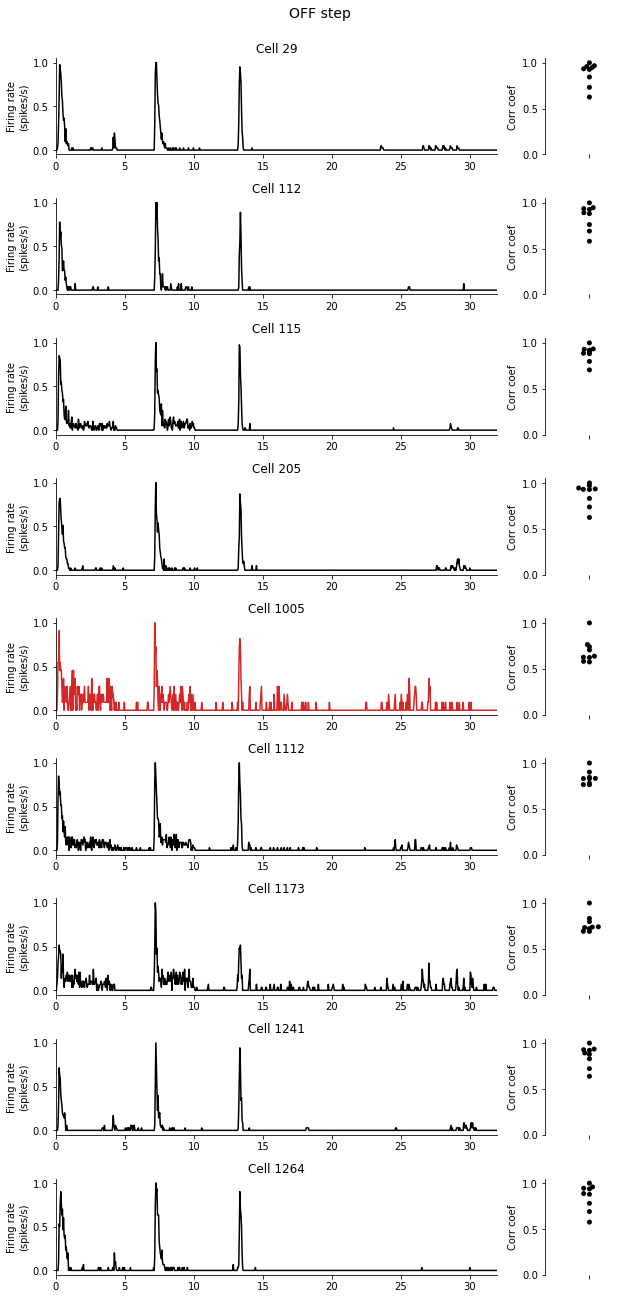

OFF sustained : [307 312 496 801]
[0.68919072 0.72887896 0.67626782]
[0.68919072 0.80868138 0.80780051]
[0.72887896 0.80868138 0.75821014]
[0.67626782 0.80780051 0.75821014]


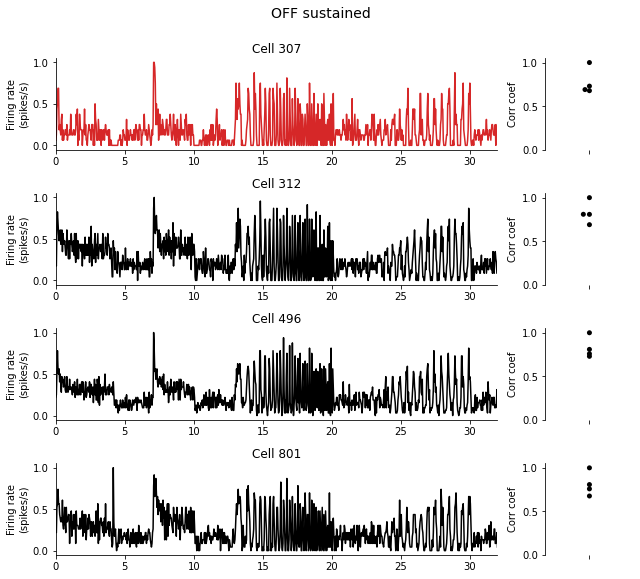

OFF alpha transient : [  40  129  190  398  417  912  913  957  995 1134 1172 1274]
[0.79985021 0.72672969 0.72838792 0.6955494  0.55993044 0.55307622
 0.47859095 0.62137214 0.67745032 0.53727816 0.65414373]
[0.79985021 0.74049611 0.74057095 0.75645872 0.5507942  0.54604139
 0.46126    0.61489692 0.66444378 0.57233287 0.76550392]
[0.72672969 0.74049611 0.63042074 0.61398577 0.41945377 0.41589371
 0.37845739 0.49820231 0.61305497 0.43637163 0.65100197]
[0.72838792 0.74057095 0.63042074 0.64070392 0.57294739 0.61510968
 0.47862619 0.64983979 0.51011642 0.450101   0.57420966]
[0.6955494  0.75645872 0.61398577 0.64070392 0.72222488 0.64294512
 0.57331414 0.67597513 0.5744564  0.67478564 0.79949982]
[0.55993044 0.5507942  0.41945377 0.57294739 0.72222488 0.88072445
 0.60294334 0.77949929 0.39948089 0.61493403 0.49134854]
[0.55307622 0.54604139 0.41589371 0.61510968 0.64294512 0.88072445
 0.60474145 0.81285308 0.3697683  0.52139144 0.43363794]
[0.47859095 0.46126    0.37845739 0.47862619 0.5

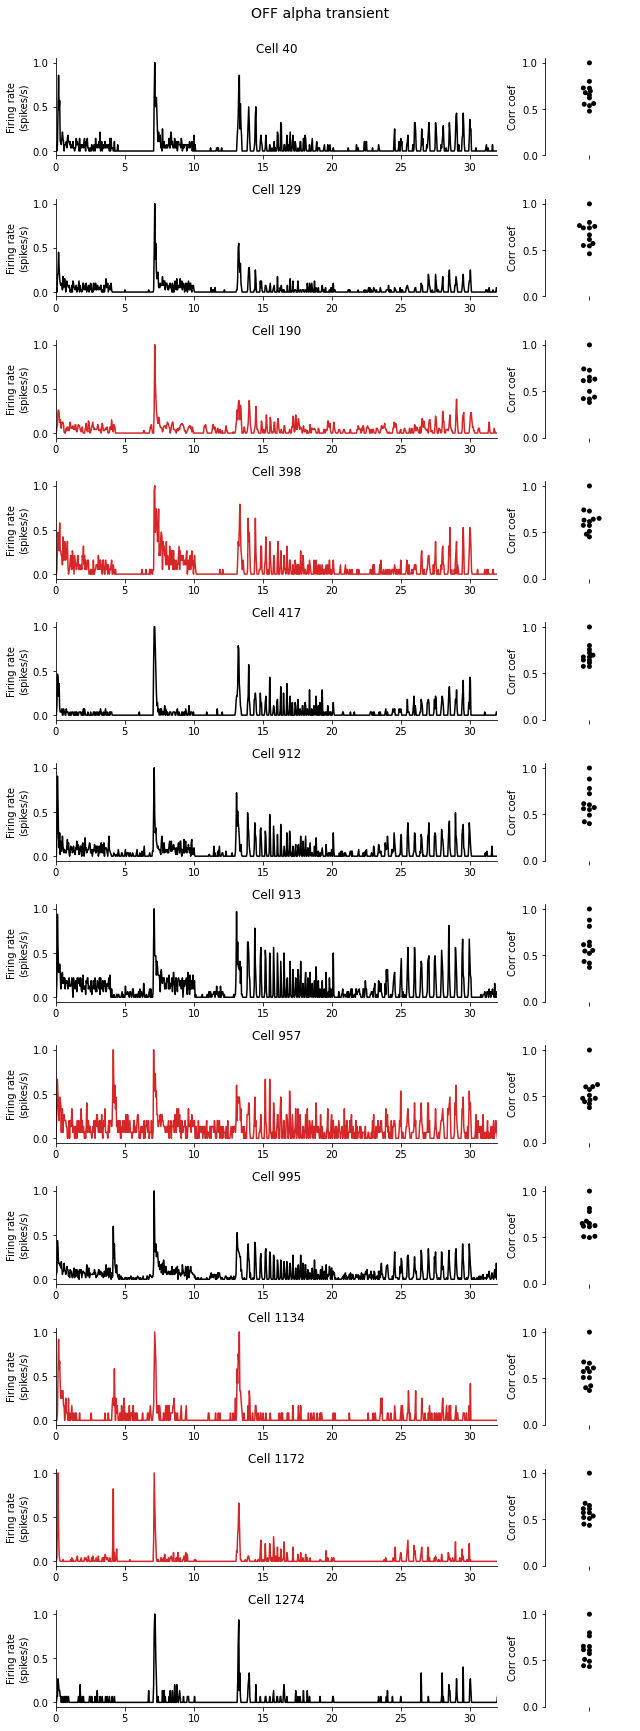

ON-OFF local-edge W3 : [ 161  385  731 1106]
[0.74980738 0.72025761 0.56774277]
[0.74980738 0.72132966 0.6993585 ]
[0.72025761 0.72132966 0.60616079]
[0.56774277 0.6993585  0.60616079]


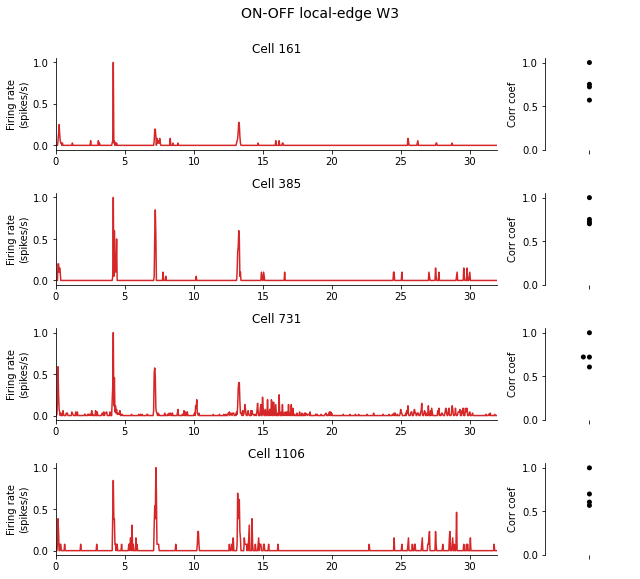

ON-OFF DS 2 : [ 60 400 945]
[0.67085019 0.42865917]
[0.67085019 0.44688044]
[0.42865917 0.44688044]


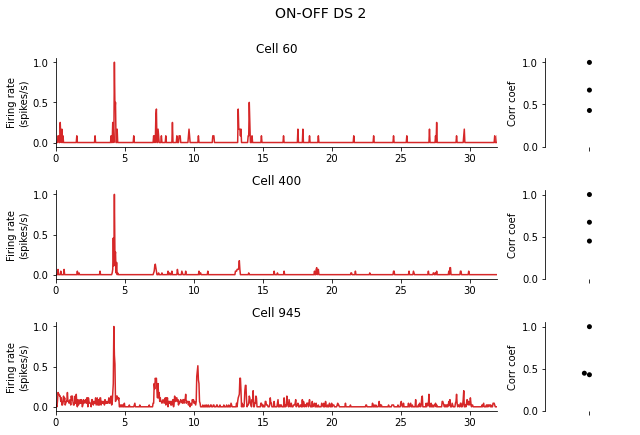

ON step : [   6   65  170  236  255  332  421 1035 1070]
[0.59170683 0.72064691 0.81557127 0.75755729 0.43064896 0.5066913
 0.75365752 0.4232339 ]
[0.59170683 0.39934625 0.67491854 0.73165182 0.23721303 0.23566871
 0.62301126 0.30085968]
[0.72064691 0.39934625 0.73644116 0.68400823 0.80280554 0.78395686
 0.59083193 0.53488706]
[0.81557127 0.67491854 0.73644116 0.86170914 0.51577439 0.50522182
 0.75339898 0.52919401]
[0.75755729 0.73165182 0.68400823 0.86170914 0.48838414 0.45407202
 0.70146671 0.43830946]
[0.43064896 0.23721303 0.80280554 0.51577439 0.48838414 0.8128905
 0.43096006 0.62926924]
[0.5066913  0.23566871 0.78395686 0.50522182 0.45407202 0.8128905
 0.47049763 0.61210046]
[0.75365752 0.62301126 0.59083193 0.75339898 0.70146671 0.43096006
 0.47049763 0.48240935]
[0.4232339  0.30085968 0.53488706 0.52919401 0.43830946 0.62926924
 0.61210046 0.48240935]


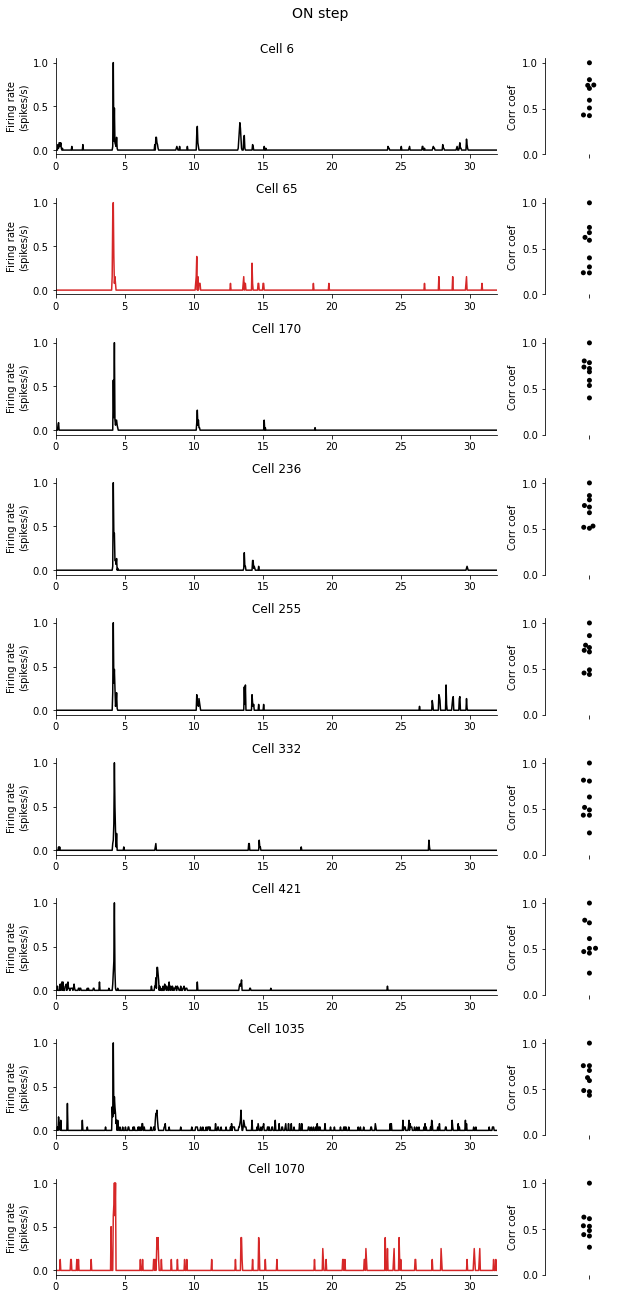

ON local transient OS : [ 217  811  831  873  953 1025]
[0.82446486 0.8109348  0.7559761  0.72911511 0.74370532]
[0.82446486 0.88815536 0.83028725 0.8366123  0.80865411]
[0.8109348  0.88815536 0.86674669 0.86170848 0.82029814]
[0.7559761  0.83028725 0.86674669 0.84543964 0.82170721]
[0.72911511 0.8366123  0.86170848 0.84543964 0.82826721]
[0.74370532 0.80865411 0.82029814 0.82170721 0.82826721]


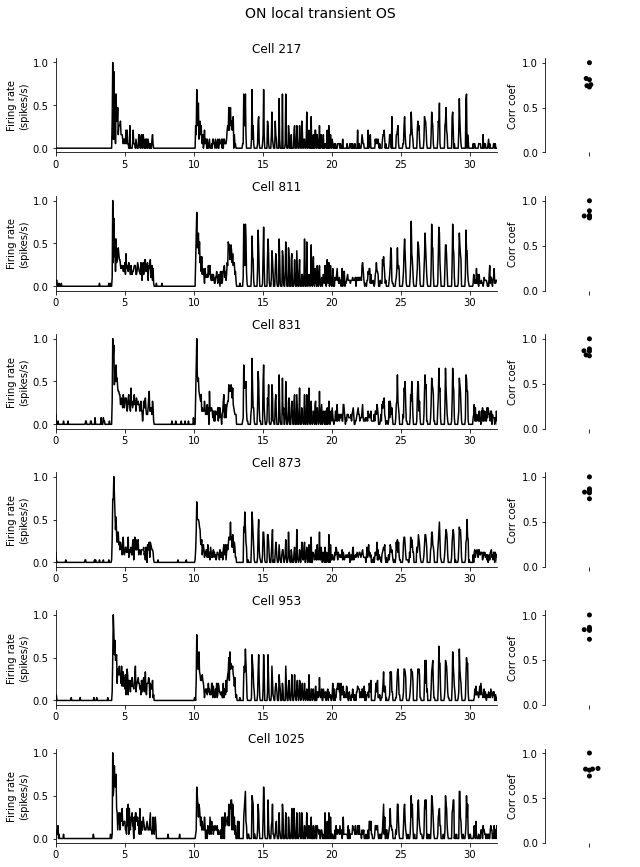

ON transient : [ 119  162  246 1114 1188]
[0.56670927 0.74930921 0.67981854 0.60394795]
[0.56670927 0.89987138 0.68806307 0.53848931]
[0.74930921 0.89987138 0.78429702 0.65012438]
[0.67981854 0.68806307 0.78429702 0.77184828]
[0.60394795 0.53848931 0.65012438 0.77184828]


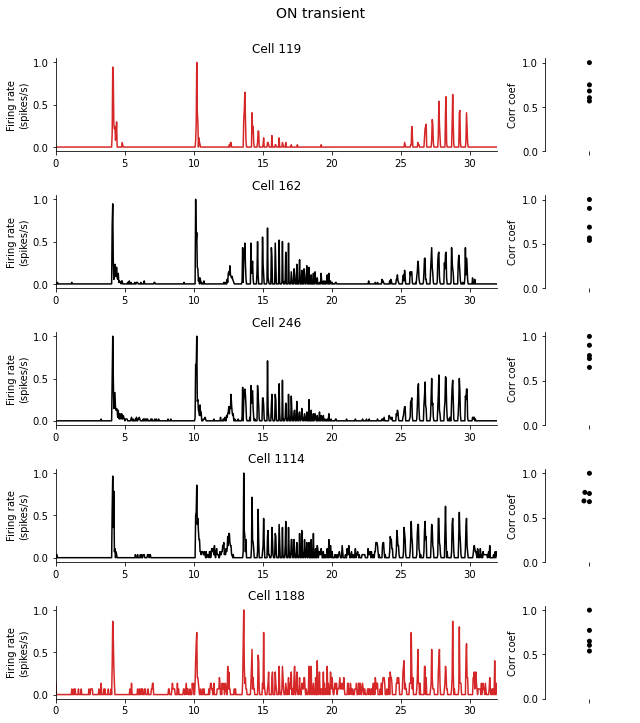

ON low frequency : [ 763 1250 1259 1265]
[0.47322024 0.57691066 0.48082797]
[0.47322024 0.66899724 0.53080982]
[0.57691066 0.66899724 0.70771277]
[0.48082797 0.53080982 0.70771277]


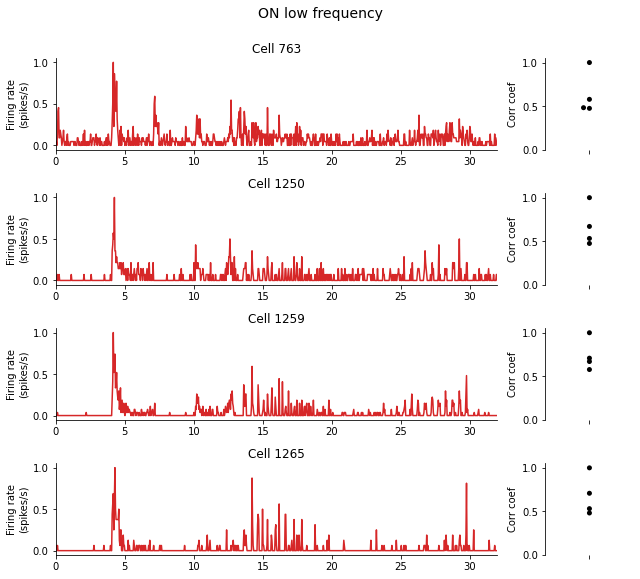

ON sustained : [931]
[]


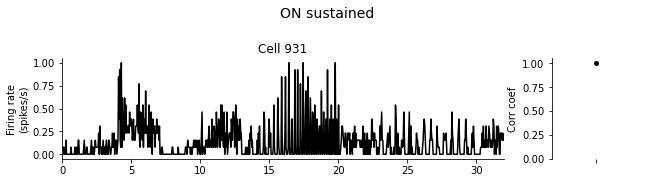

ON mini alpha : [140 244 684 785 882 901]
[0.72845638 0.76213772 0.59714615 0.80919012 0.6451038 ]
[0.72845638 0.79339391 0.6393732  0.82623457 0.59177728]
[0.76213772 0.79339391 0.77070467 0.8301105  0.6453559 ]
[0.59714615 0.6393732  0.77070467 0.68639587 0.55950813]
[0.80919012 0.82623457 0.8301105  0.68639587 0.62056127]
[0.6451038  0.59177728 0.6453559  0.55950813 0.62056127]


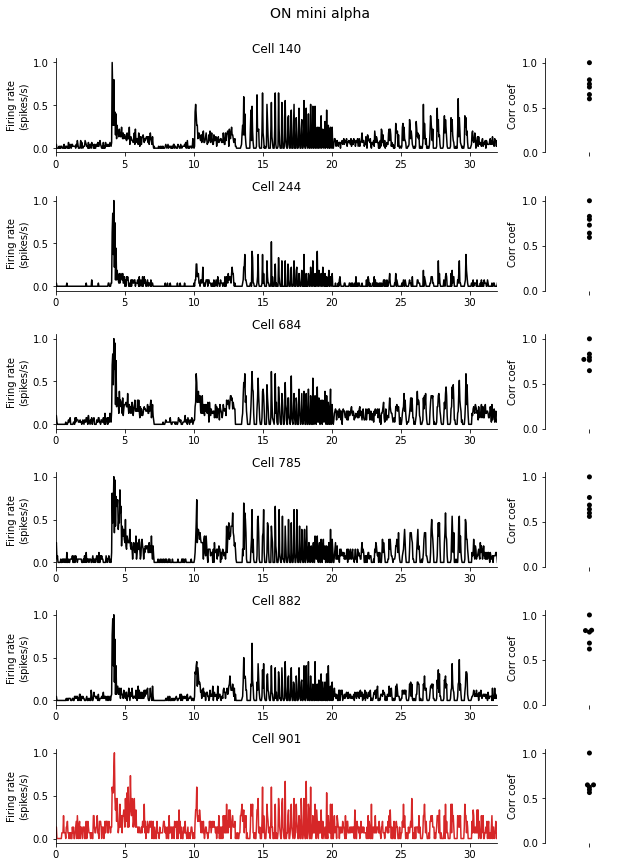

ON alpha : [418 483 489 512 519 583 639]
[0.79144462 0.7291624  0.75900571 0.78930388 0.78227486 0.76562686]
[0.79144462 0.79747224 0.82091579 0.81038977 0.85026301 0.92443706]
[0.7291624  0.79747224 0.79794201 0.78416131 0.76759894 0.76251627]
[0.75900571 0.82091579 0.79794201 0.79794826 0.78600515 0.79704502]
[0.78930388 0.81038977 0.78416131 0.79794826 0.7921124  0.80037586]
[0.78227486 0.85026301 0.76759894 0.78600515 0.7921124  0.8215481 ]
[0.76562686 0.92443706 0.76251627 0.79704502 0.80037586 0.8215481 ]


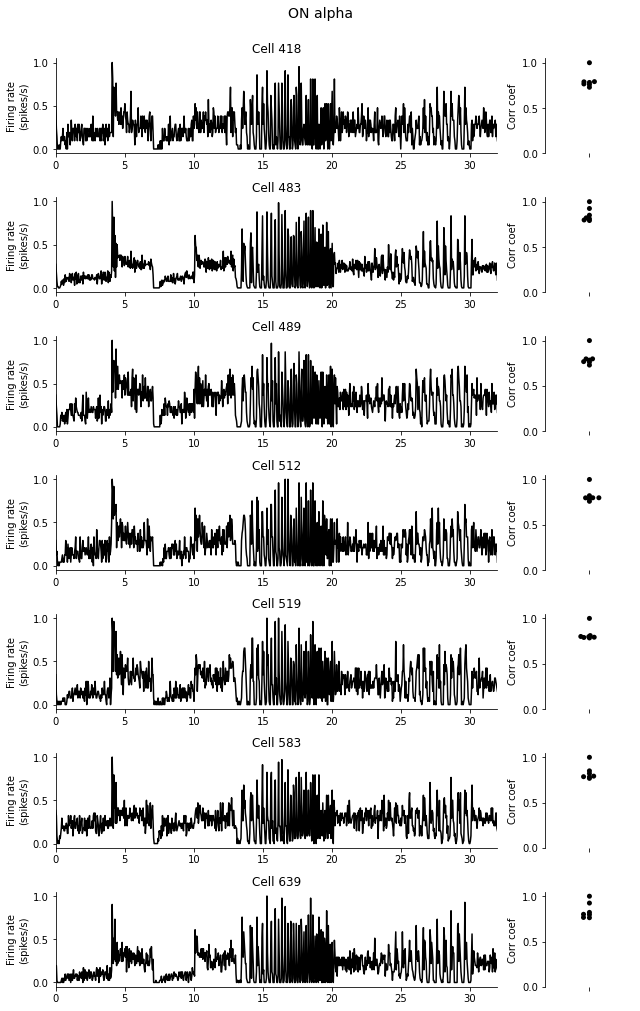

ON DS sustained 2 : [ 290  347  861 1033 1092]
[0.65318414 0.60690101 0.63659078 0.60559584]
[0.65318414 0.62474687 0.75012719 0.73535455]
[0.60690101 0.62474687 0.72048276 0.68911875]
[0.63659078 0.75012719 0.72048276 0.76409232]
[0.60559584 0.73535455 0.68911875 0.76409232]


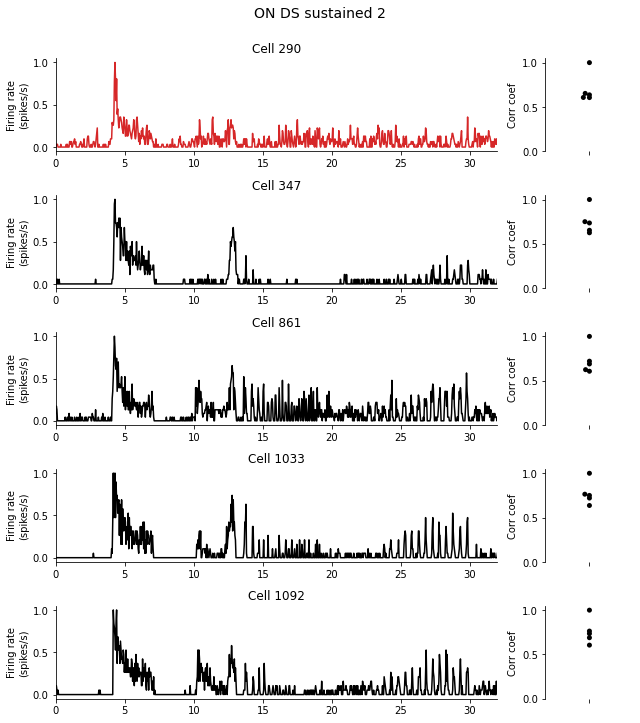

ON constrast suppression : [1108]
[]


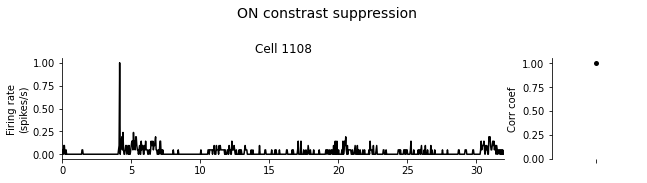

ON DS sustained 3 : [106 275]
[0.74859104]
[0.74859104]


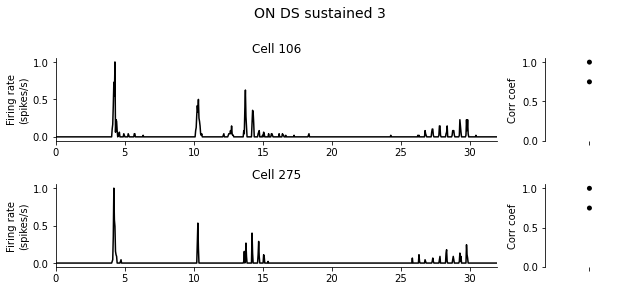

ON local sustained OS : [1082]
[]


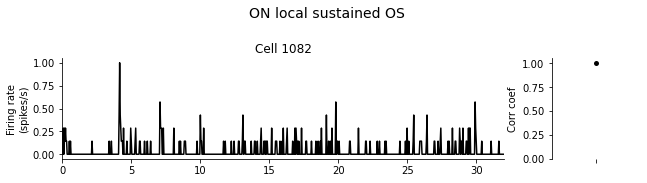

OFF suppression 1 : [21]
[]


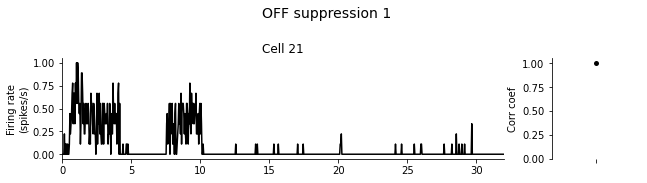

OFF suppression 2 : [1267]
[]


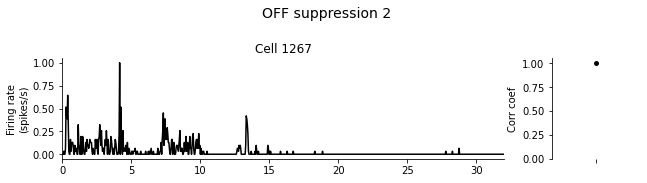

In [11]:
cell_types_cleaned = np.copy(cell_types)
# euler_labels_cleaning = zeros(len(euler_labels)) # 0: present but not cleaned type not present, 1: , 2: cleaned

baseline_len = 4 # sec
dt = 0.04 # sec
baseline_end = int(baseline_len / dt)

for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(9, 2.5))
        else:
            fig = plt.figure(figsize=(9, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 2, width_ratios = [5,1])

        cross_corrs = np.zeros((len(selected_cells), len(selected_cells)))
        
        removed_cells = []

        for i, cell_nb in enumerate(selected_cells):
            cell_index = where(cells_clustering == cell_nb)[0][0]
#             print (cell_nb, cells_clustering[cell_index])

            psth = cell_data[str(cell_nb)]['psth']

            # Normalization
            psth = psth/max(psth)

            # Cross corr
            for j, cell_nb2 in enumerate(selected_cells):
                psth2 = cell_data[str(cell_nb2)]['psth']
                # Normalization
                psth2 = psth2/max(psth2)

                cross_corrs[i,j] = np.corrcoef(psth, psth2)[0,1]
            
            # Remove that cell ?
            print (np.delete(cross_corrs[i], i))
            
            ax = fig.add_subplot(GS[i,0])
            
            if euler_label_names[iLabel] == 'OFF step':
                threshold = 0.8
            elif euler_label_names[iLabel] == 'ON transient':
                threshold = 0.78
            elif euler_label_names[iLabel] == 'ON DS sustained 2' or euler_label_names[iLabel] == 'ON DS sustained 3':
                threshold = 0.7
            else:
                threshold = 0.75
            
            if len(selected_cells) > 1 and all(delete(cross_corrs[i], i) < threshold):
                ax.plot(np.linspace(0,32,800), psth, 'C3')
                removed_cells.append(cell_index)
                cell_types_cleaned[cell_index] = nan
            else:
                ax.plot(np.linspace(0,32,800), psth, 'k')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
                
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
                
            ax = fig.add_subplot(GS[i,1])
            sns.swarmplot(y=cross_corrs[i], color='k')
            ax.set_ylim(0,1.05)
            ax.set_ylabel('Corr coef')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
        
        plt.tight_layout()

        plt.show()

In [12]:
cell_types_cleaned

array([14., 30.,  2.,  7., nan, nan, 28.,  2.,  2., nan,  7., 22., nan,
       17., 14., nan,  2., 16., 14., 22., 17., 14., 28., nan, nan,  6.,
       14., 25., nan, nan, nan,  7., 23., 14., 23., 23.,  6., 23., 23.,
       23., 23., 22., nan, nan, 22.,  6., 16., 16., 25., 16., 22., nan,
        7.,  7., 21., nan, 16., nan,  7., nan, 16., 25., 14., nan, 29.,
       25., nan, 27.,  2., 17., nan, nan,  2., nan,  2., nan, nan,  2.,
       nan, 31.,  7.])

In [13]:
cell_types

array([14., 30.,  2.,  7., 12., 14., 28.,  2.,  2., 17.,  7., 22.,  9.,
       17., 14.,  7.,  2., 16., 14., 22., 17., 14., 28., 25.,  6.,  6.,
       14., 25.,  9.,  7., 12.,  7., 23., 14., 23., 23.,  6., 23., 23.,
       23., 23., 22.,  9., 20., 22.,  6., 16., 16., 25., 16., 22., 22.,
        7.,  7., 21., 12., 16.,  7.,  7.,  2., 16., 25., 14., 14., 29.,
       25.,  9., 27.,  2., 17.,  7.,  7.,  2., 17.,  2., 20., 20.,  2.,
       20., 31.,  7.])

## Plot new types

OFF step : [  29  112  115  205 1112 1173 1241 1264]


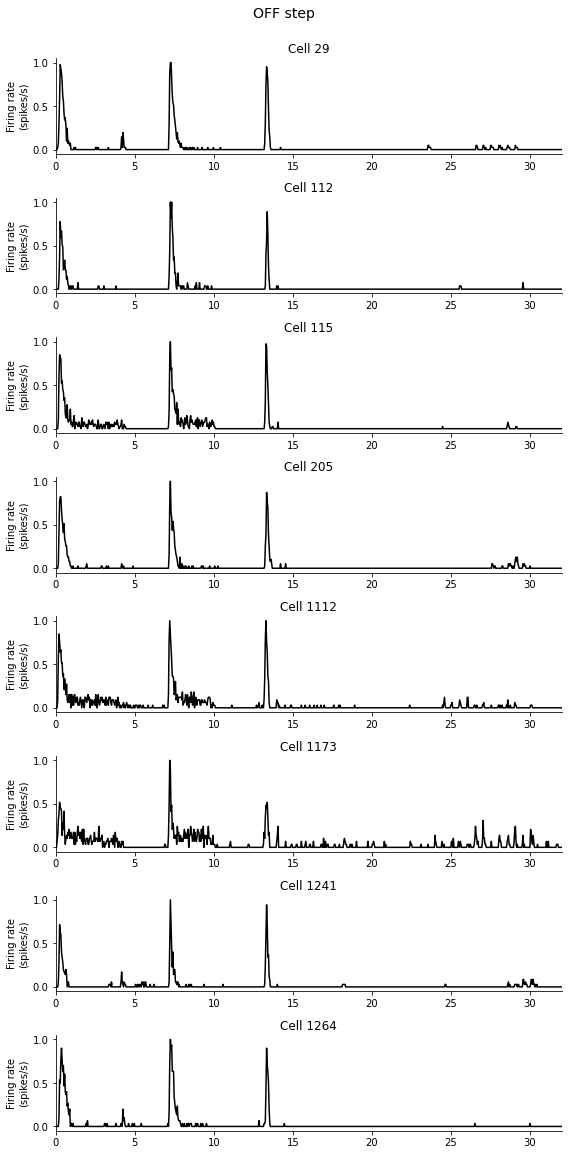

OFF sustained : [312 496 801]


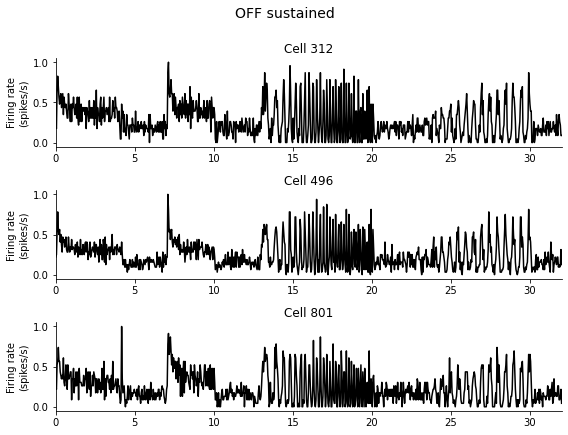

OFF alpha transient : [  40  129  417  912  913  995 1274]


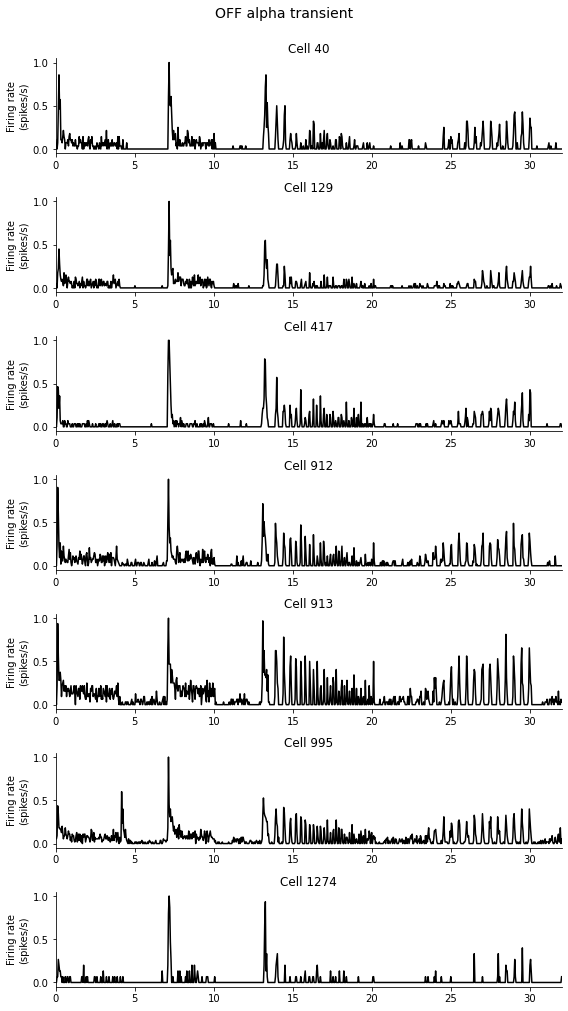

ON step : [   6  170  236  255  332  421 1035]


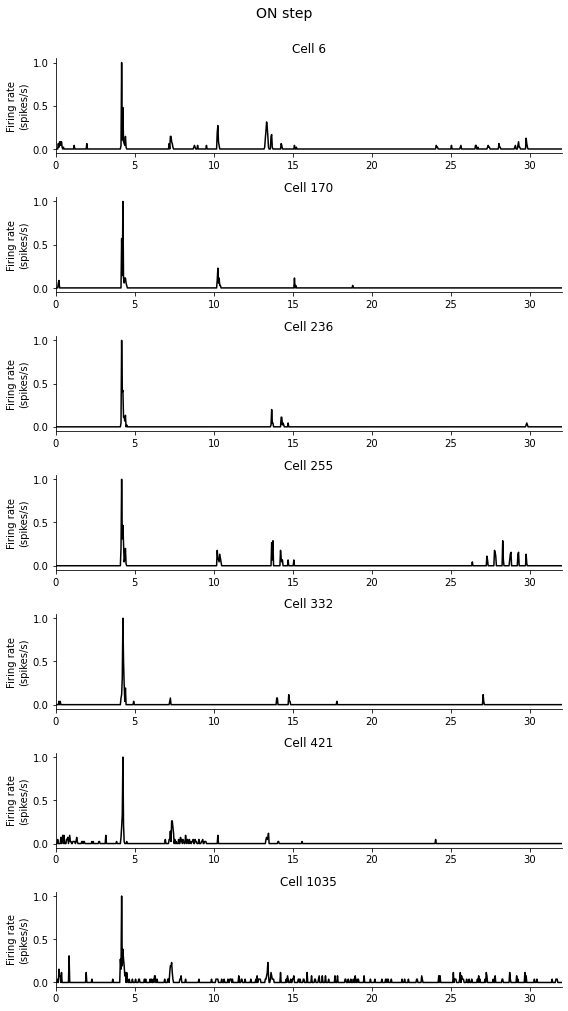

ON local transient OS : [ 217  811  831  873  953 1025]


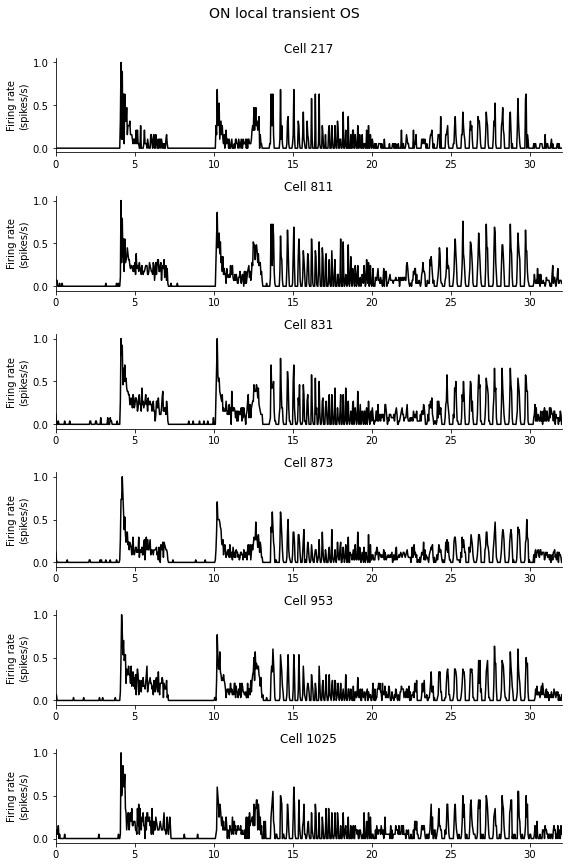

ON transient : [ 162  246 1114]


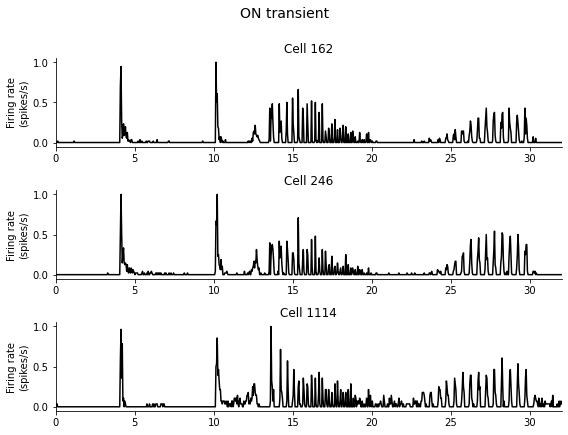

ON sustained : [931]


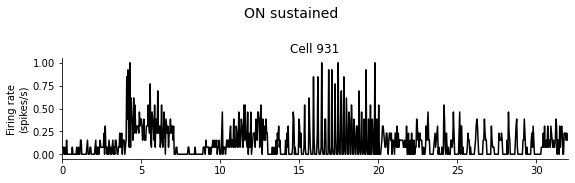

ON mini alpha : [140 244 684 785 882]


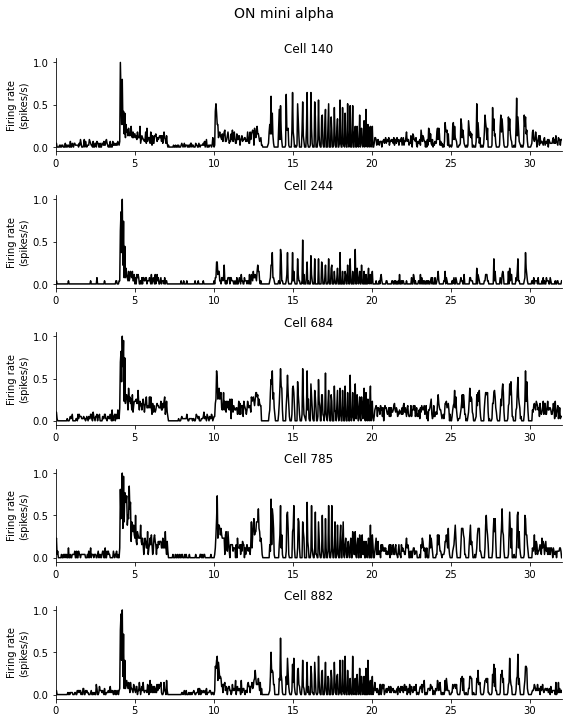

ON alpha : [418 483 489 512 519 583 639]


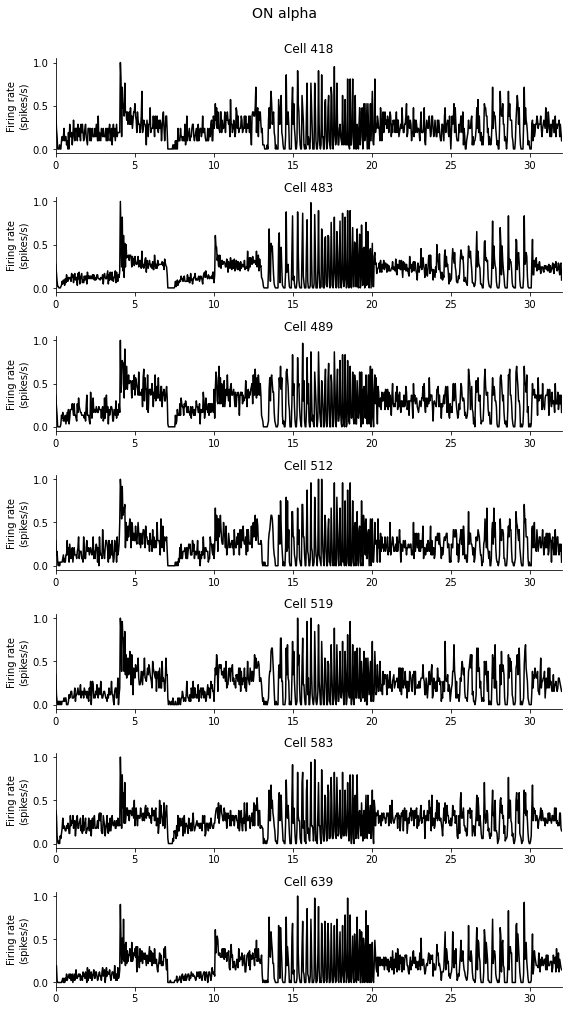

ON DS sustained 2 : [ 347  861 1033 1092]


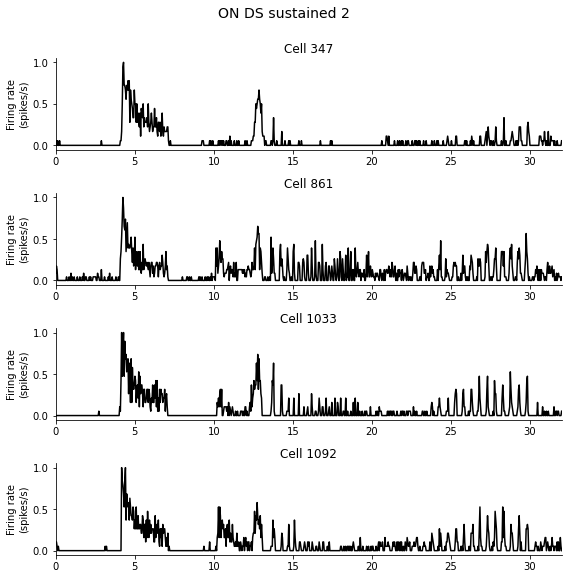

ON constrast suppression : [1108]


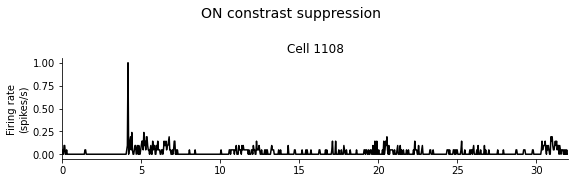

ON DS sustained 3 : [106 275]


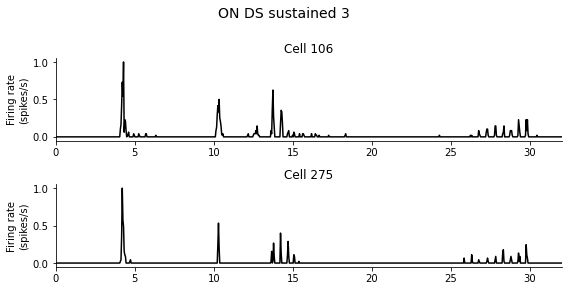

ON local sustained OS : [1082]


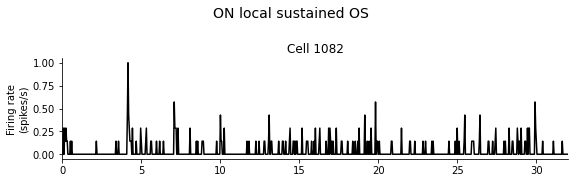

OFF suppression 1 : [21]


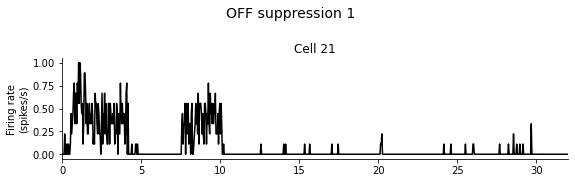

OFF suppression 2 : [1267]


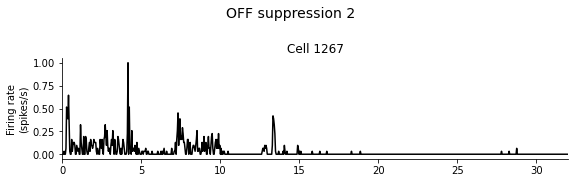

In [14]:
for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types_cleaned == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(8, 2.5))
        else:
            fig = plt.figure(figsize=(8, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 1)

        for i, cell_nb in enumerate(selected_cells):

            psth = cell_data[str(cell_nb)]['psth']
            
            ax = fig.add_subplot(GS[i])
            ax.plot(np.linspace(0,32,800), psth/amax(psth), 'k')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
        
        plt.tight_layout()
        plt.show()

In [15]:
# Save cleaned Baden type for each cell in 'selected_cells'
fsave = exp_path + str(exp) + '_celltype_Baden_cleaned'
save_obj(cell_types_cleaned,fsave)

In [ ]:
euler